### Extract Dataset Zip Folder

In [1]:
import zipfile
import os
with zipfile.ZipFile('./da7ee7_raw.zip', 'r') as zip_ref:
    zip_ref.extractall("./")

### Tokenizing Methods

In [2]:
from nltk.tokenize import RegexpTokenizer
import nltk
import re
nltk.download('punkt')

def tokenize_by_split(text):
    split_on = r'[,\!\.\،\:\[\]\(\)\s\'\"؟]'
    tokenized_document=re.split(split_on,text)
    tokenized_document=[token for token in tokenized_document if token!=""]
    return tokenized_document


def tokenizer(text):
    pattern = r'\b\w+\b|[^\w\s]'
    word_tokenizer = RegexpTokenizer(pattern)
    tokens = word_tokenizer.tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to C:\Users\Malak
[nltk_data]     Labib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# List to store document lengths


def tokenize_all_documents(folder):
    doc_lengths = []
    all_documents= dict()
    directory = os.path.join(os.getcwd(), folder)
    for name in os.listdir(directory):
        filepath = os.path.join(directory, name)
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                # print(f"Content of '{name}'")
                all_documents[name]=tokenize_by_split(f.read())
                doc_lengths.append(len(all_documents[name]))
                # print(all_documents[name])
        except (PermissionError, IsADirectoryError, UnicodeDecodeError) as e:
            print(f"Skipping '{name}' due to error: {e}")
        print()
    return all_documents,doc_lengths


In [4]:
# dictionary with document name as key and array of tokens as value

all_documents_tokenized, doc_lengths= tokenize_all_documents("Raw Data") 

import matplotlib.pyplot as plt

def plot_distribution(doc_lengths):
    plt.figure(figsize=(10,5))
    plt.hist(doc_lengths, bins=30, color="skyblue", edgecolor="black")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Documents")
    plt.title("Distribution of Document Lengths")
    plt.show()


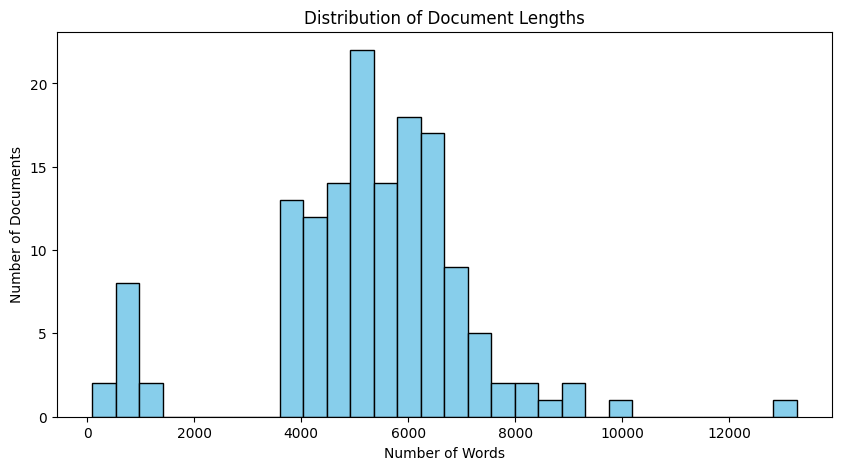

In [5]:
plot_distribution(doc_lengths)

In [6]:
import string
import re

## use this method to ensure additional punctuations is removed & diacritics (tashkeel)
def remove_punctuations_and_numbers(all_documents):
    arabic_punctuation = '،؛؟«»ـ'
    additional_punctuation = '[]\\'
    all_punctuation = string.punctuation + arabic_punctuation + additional_punctuation
    arabic_diacritics = re.compile(r'[\u064B-\u065F\u0610-\u061A\u06D6-\u06ED]')
    
    for document in all_documents:
        filtered = []
        for entry in all_documents[document]:
            entry_no_diacritics = re.sub(arabic_diacritics, '', entry)
            if (entry_no_diacritics and all(char not in all_punctuation for char in entry_no_diacritics) and not any(char.isdigit() for char in entry_no_diacritics)
):
                filtered.append(entry_no_diacritics)
        all_documents[document] = filtered  
                
    return all_documents


In [7]:
filtered_all_docs= remove_punctuations_and_numbers(all_documents_tokenized)

In [8]:
filtered_all_docs

{'Chat GPT  الدحيح.txt': ['موسيقى',
  'موسيقى',
  'عمي',
  'بسيوني',
  'الايام',
  'يا',
  'راجل',
  'طيب',
  'دلوقتي',
  'افتكرت',
  'عم',
  'بسيوني',
  'سامحني',
  'يا',
  'عم',
  'بسيوني',
  'بعدين',
  'بعد',
  'ما',
  'استبدلتوني',
  'بالذكاء',
  'الاصطناعي',
  'وعشان',
  'ايه',
  'عشان',
  'ايه',
  'كل',
  'ده',
  'عشان',
  'اذكى',
  'تمام',
  'وما',
  'بيشربش',
  'سجاير',
  'في',
  'المكتب',
  'بس',
  'اديك',
  'محتاج',
  'ولايس',
  'وسط',
  'الناس',
  'الخبره',
  'عمرها',
  'ما',
  'تيجي',
  'من',
  'المكنه',
  'او',
  'كمبيوتر',
  'الخبره',
  'الحقيقيه',
  'بتيجي',
  'من',
  'الانسان',
  'اللي',
  'صانع',
  'الكمبيوتر',
  'ما',
  'فيش',
  'احسن',
  'من',
  'الذكاء',
  'الطبيعي',
  'ولا',
  'الرضاع',
  'الطبيعي',
  'ولا',
  'عسل',
  'جبل',
  'النحل',
  'الطبيعي',
  'الاصلي',
  'الجميل',
  'ارجوك',
  'يا',
  'عم',
  'بسيوني',
  'يا',
  'راجل',
  'يا',
  'طيب',
  'شوف',
  'لنا',
  'حل',
  'وشغل',
  'لنا',
  'المكنه',
  'بسم',
  'الله',
  'الرحمن',
  'الرحيم',
  'خد',
  'بالك',
  '

In [9]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

def plot_bigram(all_docs):
    all_bigrams = [bigram for doc in all_docs.values() if len(doc) > 1 for bigram in ngrams(doc, 2)]

# Count the most common bigrams
    bigram_freq = Counter(all_bigrams).most_common(30)  # Show top 20 bigrams

# Prepare data for visualization
    bigrams, counts = zip(*bigram_freq)  # Unpacking bigram and count

# Properly reshape and align Arabic text
    bigram_labels = [get_display(arabic_reshaper.reshape(" ".join(bigram))) for bigram in bigrams]

# Set Arabic font (make sure it's installed on your system)
    plt.rcParams['font.family'] = 'Arial'  # You can replace 'Arial' with any Arabic-supporting font

# Plot the top bigrams
    plt.figure(figsize=(12, 6))
    plt.barh(bigram_labels[::-1], counts[::-1])  # Reverse for correct order
    plt.xlabel("Frequency", fontsize=14)
    plt.title("Top 30 Bigrams", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

# Show the plot
    plt.show()


ModuleNotFoundError: No module named 'arabic_reshaper'

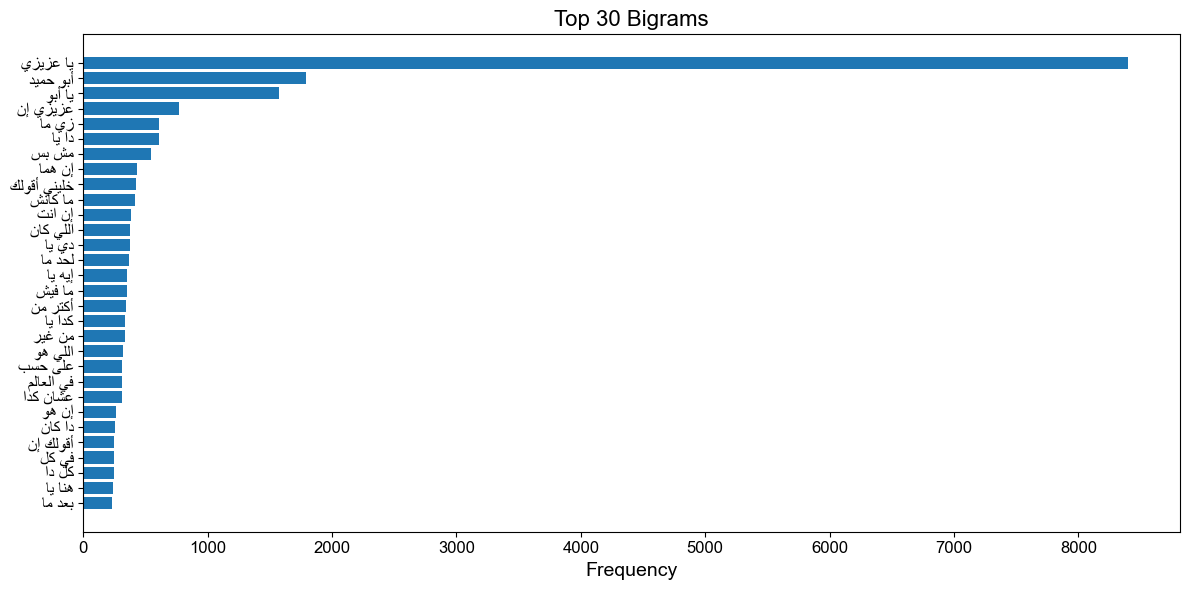

In [10]:
plot_bigram(filtered_all_docs)

### Calculating TDF 

In [11]:
def word_count_per_document(all_docs):
    for document in all_docs:
        tokens= all_docs[document]
        word_count= dict()
        for token in tokens:
            if( not token in word_count):
                word_count[token]=1
            else:
                word_count[token]+=1
        all_docs[document]=word_count
    return all_docs                

In [12]:
word_count_in_doc= word_count_per_document(filtered_all_docs)

In [13]:
word_count_in_doc

{'Chat GPT  الدحيح.txt': {'موسيقى': 5,
  'عمي': 1,
  'بسيوني': 4,
  'الايام': 2,
  'يا': 42,
  'راجل': 2,
  'طيب': 2,
  'دلوقتي': 8,
  'افتكرت': 1,
  'عم': 5,
  'سامحني': 1,
  'بعدين': 1,
  'بعد': 6,
  'ما': 36,
  'استبدلتوني': 1,
  'بالذكاء': 1,
  'الاصطناعي': 10,
  'وعشان': 2,
  'ايه': 20,
  'عشان': 26,
  'كل': 18,
  'ده': 28,
  'اذكى': 1,
  'تمام': 1,
  'وما': 4,
  'بيشربش': 1,
  'سجاير': 1,
  'في': 73,
  'المكتب': 1,
  'بس': 20,
  'اديك': 1,
  'محتاج': 2,
  'ولايس': 1,
  'وسط': 1,
  'الناس': 4,
  'الخبره': 3,
  'عمرها': 1,
  'تيجي': 2,
  'من': 59,
  'المكنه': 2,
  'او': 21,
  'كمبيوتر': 2,
  'الحقيقيه': 1,
  'بتيجي': 1,
  'الانسان': 8,
  'اللي': 52,
  'صانع': 1,
  'الكمبيوتر': 6,
  'فيش': 3,
  'احسن': 1,
  'الذكاء': 12,
  'الطبيعي': 3,
  'ولا': 7,
  'الرضاع': 1,
  'عسل': 1,
  'جبل': 1,
  'النحل': 1,
  'الاصلي': 2,
  'الجميل': 1,
  'ارجوك': 1,
  'شوف': 2,
  'لنا': 4,
  'حل': 1,
  'وشغل': 1,
  'بسم': 1,
  'الله': 3,
  'الرحمن': 1,
  'الرحيم': 1,
  'خد': 3,
  'بالك': 1,
  'حاضر': 1,
 

### Choosing words appearing across all documents with highest counts

In [14]:
def count_word_across_docs(unique_word_count):
    all_words=dict()
    for doc in unique_word_count:
        tokens= unique_word_count[doc]
        for token in tokens:
            if (not token in all_words):
                all_words[token]=tokens[token]
            else: 
                all_words[token]+=tokens[token]    
    return all_words            

def choose_frequent_words_100(count_all_words):
    stopwords=[]
    for token in count_all_words:
        if(count_all_words[token]>=100):
            stopwords.append(token)
    return stopwords    

def choose_frequent_words_150(count_all_words):
    stopwords=[]
    for token in count_all_words:
        if(count_all_words[token]>=150):
            stopwords.append(token)
    return stopwords 

### Checking Word Frequency Across All Documents (not cleaned)

In [15]:
## not cleaned (every word kept same as in dataset)
word_count_in_all_doc=count_word_across_docs(word_count_in_doc)
stopwords_not_cleaned= choose_frequent_words_100(word_count_in_all_doc)

In [16]:
stopwords_not_cleaned

['يا',
 'دلوقتي',
 'بعد',
 'ما',
 'ايه',
 'عشان',
 'كل',
 'ده',
 'وما',
 'في',
 'بس',
 'الناس',
 'من',
 'او',
 'اللي',
 'فيش',
 'ولا',
 'الله',
 'الموضوع',
 'انت',
 'على',
 'لا',
 'تاني',
 'لو',
 'مش',
 'انا',
 'حد',
 'مع',
 'هذه',
 'هو',
 'عليه',
 'ان',
 'مثلا',
 'دول',
 'كانوا',
 'ممكن',
 'عزيزي',
 'دي',
 'ازاي',
 'غير',
 'طبعا',
 'بعض',
 'كمان',
 'ولكن',
 'كده',
 'كتير',
 'زي',
 'قبل',
 'حصل',
 'لكن',
 'كانش',
 'فيه',
 'وقت',
 'جدا',
 'لحد',
 'يبقى',
 'فيها',
 'لازم',
 'يكون',
 'حميد',
 'عن',
 'وفي',
 'له',
 'طب',
 'احنا',
 'تبقى',
 'واحد',
 'خلاص',
 'عليها',
 'منه',
 'بين',
 'وهو',
 'الكلام',
 'عنده',
 'يعني',
 'بقى',
 'اسمه',
 'لما',
 'حتى',
 'هذا',
 'حسب',
 'نفس',
 'هنا',
 'هي',
 'كله',
 'كان',
 'بتقول',
 'نفسه',
 'طول',
 'كانت',
 'بشكل',
 'واللي',
 'مليون',
 'هناك',
 'بتاع',
 'عايز',
 'ليه',
 'بيقول',
 'عارف',
 'يوم',
 'برضه',
 'دا',
 'إن',
 'العالم',
 'أوي',
 'أنا',
 'أقولك',
 'أي',
 'إيه',
 'لأ',
 'كلها',
 'حاجة',
 'تانية',
 'كدا',
 'سنة',
 'الحرب',
 'التانية',
 'و',
 'أو',
 '

In [17]:
# save to use later in preprocessing
with open('stopwords.txt', 'w', encoding='utf-8') as f:
    for word in stopwords_not_cleaned:
        f.write(word + '\n')

In [18]:
greater_than_150=choose_frequent_words_150(word_count_in_all_doc)

In [19]:
greater_than_150

['يا',
 'دلوقتي',
 'بعد',
 'ما',
 'عشان',
 'كل',
 'ده',
 'في',
 'بس',
 'الناس',
 'من',
 'اللي',
 'ولا',
 'الله',
 'انت',
 'على',
 'لا',
 'تاني',
 'لو',
 'مش',
 'حد',
 'مع',
 'هذه',
 'هو',
 'عليه',
 'ان',
 'مثلا',
 'دول',
 'كانوا',
 'ممكن',
 'عزيزي',
 'دي',
 'ازاي',
 'غير',
 'طبعا',
 'بعض',
 'كمان',
 'ولكن',
 'كتير',
 'زي',
 'قبل',
 'فيه',
 'جدا',
 'لحد',
 'يبقى',
 'فيها',
 'حميد',
 'عن',
 'وفي',
 'احنا',
 'واحد',
 'بين',
 'يعني',
 'بقى',
 'لما',
 'حتى',
 'هذا',
 'هنا',
 'هي',
 'كان',
 'كانت',
 'عايز',
 'ليه',
 'عارف',
 'دا',
 'إن',
 'العالم',
 'أنا',
 'أقولك',
 'أي',
 'إيه',
 'لأ',
 'حاجة',
 'كدا',
 'سنة',
 'و',
 'أو',
 'إنه',
 'أكتر',
 'أول',
 'أبو',
 'لأن',
 'إنها',
 'هما',
 'الوقت',
 'ودا',
 'خليني']

In [20]:
# compare words not >=150 but >=100 to see if relevant to remove

def find_extra_words(most_frequent_100, most_frequent_150):
    return set(most_frequent_100) - set(most_frequent_150)   

In [21]:
extra_possible_stopwords= find_extra_words(stopwords_not_cleaned, greater_than_150)

In [22]:
extra_possible_stopwords

{'ألف',
 'أمريكا',
 'أوي',
 'اسمه',
 'الإنسان',
 'التانية',
 'الحرب',
 'الحقيقة',
 'الراجل',
 'الكلام',
 'الموضوع',
 'انا',
 'او',
 'ايه',
 'بتاع',
 'بتقول',
 'برضه',
 'بشكل',
 'بيقول',
 'تانية',
 'تبقى',
 'حسب',
 'حصل',
 'خلاص',
 'شوية',
 'طب',
 'طول',
 'عليها',
 'عنده',
 'فيش',
 'كانش',
 'كده',
 'كله',
 'كلها',
 'لازم',
 'لسة',
 'لكن',
 'له',
 'مليون',
 'منه',
 'مين',
 'نفس',
 'نفسه',
 'هناك',
 'واحدة',
 'واللي',
 'وقت',
 'وقتها',
 'وما',
 'وهو',
 'يكون',
 'يوم'}

### Checking word frequency after cleaning a bit (combining words)

In [23]:
## Trying to see count difference (same word in multiple forms)
def simplified_form(token):
    found = True
    base_word = ""
    if token.startswith("و"):  
        base_word = token[1:] 
    elif token.startswith("ب") and len(token) > 3:  
        base_word = token[1:]  
    elif token.startswith("ك") and len(token) > 3:  
        base_word = token[1:]  
    elif token.startswith("ف") and len(token) > 3:  
        base_word = token[1:]  
    elif token.startswith("ل") and len(token) > 3:  
        base_word = token[1:]      
    else:
        found = False               
    return base_word, found


In [24]:
def token_base_word(token):
    found=True
    base_word=""
    if token.startswith('وال'):  
        base_word = token[3:]   
    elif token.startswith('و') and len(token) > 1:  # Check if the word starts with 'و' and is not just 'و'
        base_word = token[1:] 
    elif token.startswith("ال") and token!="اللى": 
        base_word = token[2:] 
    elif token.startswith("بال") and len(token) > 3:  
        base_word = token[3:]  
    elif token.startswith('ب') and len(token) > 3:  # cases like بشر
        base_word = token[1:]     
    elif token.startswith("كال") and len(token) > 3:  
        base_word = token[3:] 
    elif token.startswith("ك") and len(token) > 2:  # cases like كل
        base_word = token[1:] 
    elif token.startswith("لل") and len(token) > 2:  
        base_word = token[2:]      
    elif token.startswith("ل") and len(token) > 1:  
        base_word = token[1:]     
    else:
        found=False        
    return base_word,found     

In [25]:
#check across all documents الكلمة + with و\ك\ب\ال\ل

def remove_duplicates_with_prefixes(word_count_per_doc):
    all_words = set()  
    removed_words_with_prefixes = []
    for document in word_count_per_doc:
        all_words.update(word_count_per_doc[document].keys())    
    for document in word_count_per_doc:
        tokens = word_count_per_doc[document]
        keys_to_process = list(tokens.keys())  
        for token in keys_to_process:
            base_word,found= token_base_word(token)
            second_base, second_match=simplified_form(token) #finding with ال if no presence of one without
            if base_word in all_words and found:
                if base_word not in tokens:
                    tokens[base_word]=0
                tokens[base_word] += tokens[token]
                removed_words_with_prefixes.append(token)
                del tokens[token]  
            elif second_base in all_words and second_match:
                if second_base not in tokens:
                    tokens[second_base]=0
                removed_words_with_prefixes.append(token)
                tokens[second_base]+=tokens[token]  
                del tokens[token]  
    return word_count_per_doc,removed_words_with_prefixes

    

In [26]:
# applied on every words in each document separately
# count_words_in_doc was a dictionary with key document name, value a dictionary of word in document 
# word in document is (key) and it's count as a value

unique_word_count,removed_words_with_prefixes= remove_duplicates_with_prefixes(word_count_in_doc)

In [27]:
# Now we count similar words with prefixes removed across all documents again
cleaned_count_per_doc= count_word_across_docs(unique_word_count)

In [28]:
# These are stopwards after prefixes were removed and count across doc recalculated
stopwords_after_cleaning= choose_frequent_words_100(cleaned_count_per_doc)

In [29]:
stopwords_after_cleaning

['يا',
 'راجل',
 'دلوقتي',
 'بعد',
 'ما',
 'ايه',
 'عشان',
 'كل',
 'ده',
 'في',
 'بس',
 'من',
 'او',
 'فيش',
 'خد',
 'انت',
 'على',
 'تاني',
 'مش',
 'انا',
 'حد',
 'مع',
 'جديد',
 'هذه',
 'هو',
 'عليه',
 'ان',
 'مثلا',
 'دول',
 'كانوا',
 'ممكن',
 'تكون',
 'عزيزي',
 'دي',
 'ازاي',
 'غير',
 'طبعا',
 'بعض',
 'كتير',
 'زي',
 'قبل',
 'حصل',
 'كانش',
 'فيه',
 'وقت',
 'جدا',
 'يبقى',
 'تعمل',
 'فيها',
 'لازم',
 'يكون',
 'مهم',
 'حميد',
 'عن',
 'طب',
 'احنا',
 'تبقى',
 'يقول',
 'خلاص',
 'عليها',
 'يعمل',
 'منه',
 'تقول',
 'بين',
 'عنده',
 'يعني',
 'بقى',
 'اسمه',
 'حتى',
 'هذا',
 'حسب',
 'نفس',
 'هنا',
 'هي',
 'نفسه',
 'طول',
 'مليون',
 'هناك',
 'بتاع',
 'عايز',
 'شخص',
 'حاجات',
 'ليه',
 'عالم',
 'عارف',
 'يوم',
 'عايزين',
 'برضه',
 'سبب',
 'ناس',
 'ك',
 'موضوع',
 'ا',
 'و',
 'ي',
 'مان',
 'كن',
 'بشر',
 'ه',
 'احد',
 'له',
 'شكل',
 'لي',
 'عادي',
 'يحصل',
 'دا',
 'إن',
 'أوي',
 'أنا',
 'أقولك',
 'أي',
 'إيه',
 'حاجة',
 'تانية',
 'حلقة',
 'جديدة',
 'سنة',
 'أو',
 'مين',
 'واحدة',
 'سنين',
 'أ

In [ ]:
# 17 extra words after merging prefixes 
len(stopwords_after_cleaning)- len(stopwords_not_cleaned)

17

In [31]:
greater_than_150_cleaned= choose_frequent_words_150(cleaned_count_per_doc)

In [32]:
greater_than_550_cleaned= choose_frequent_words_550(cleaned_count_per_doc)

In [33]:
extra_stopwards_cleaned=find_extra_words(stopwords_after_cleaning,greater_than_550_cleaned)

In [ ]:
extra_stopwards_cleaned

{'آخر',
 'أرض',
 'أكبر',
 'ألف',
 'أمريكا',
 'أوي',
 'إلا',
 'إنسان',
 'اسمه',
 'او',
 'ايه',
 'بتاع',
 'برضه',
 'بشر',
 'بير',
 'تاريخ',
 'تبقى',
 'تحت',
 'تعمل',
 'تقول',
 'تكون',
 'جديد',
 'جديدة',
 'حاجات',
 'حسب',
 'حصل',
 'حقيقة',
 'حلقة',
 'خد',
 'خلاص',
 'درجة',
 'راجل',
 'سبب',
 'سنين',
 'شخص',
 'شركة',
 'شوية',
 'طول',
 'عادي',
 'عايزين',
 'عليها',
 'عنده',
 'فيش',
 'كانش',
 'كرة',
 'لازم',
 'لسة',
 'لكن',
 'مرة',
 'مشكلة',
 'مكان',
 'مليون',
 'منه',
 'مهم',
 'موضوع',
 'مين',
 'ميه',
 'نظام',
 'وقتها',
 'يحصل',
 'يعمل'}

### In how many documents was the same word considered frequent?

Finding min values in IDF (most freq)

In [35]:
import math

def calculate_idf(term_document_count):
    idf_values = dict()  # Dictionary to store the number of documents the word was present in
    documents_count = len(term_document_count)
    for doc in term_document_count:
        tokens = term_document_count[doc]
        for token in tokens:
            if token not in idf_values:
                idf_values[token] = 1
            else:
                idf_values[token] += 1  
    for key in idf_values:
        idf_values[key] = math.log10(documents_count / idf_values[key])     
    sorted_idf = dict(sorted(idf_values.items(), key=lambda item: item[1]))
    return sorted_idf


In [36]:
def find_top_100(idf_for_word):
    top_100_freq=[]
    counter=0
    for entry in idf_for_word :
        top_100_freq.append(entry)
        counter=counter+1
        if(counter==100):
            break
    return top_100_freq

def find_top_150(idf_for_word):
    top_150_freq=[]
    counter=0
    for entry in idf_for_word:
        top_150_freq.append(entry)
        counter=counter+1
        if(counter==150):
            break
    return top_150_freq
 

In [37]:
idf=calculate_idf(word_count_in_doc)
idf_cleaned=calculate_idf(unique_word_count)

In [38]:
def compute_tf_idf(idf_values, documents):
    scores = dict()
    for doc in documents:
        scores[doc] = dict()
        for token in documents[doc]:  
            tf = documents[doc][token] 
            idf = idf_values[token]
            scores[doc][token] = tf * idf  
    return scores


In [39]:
tf_idf_values=compute_tf_idf(idf,word_count_in_doc)

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

def get_top_words(tf_idf_scores, top_n=7):
    top_scores = {}
    for doc, scores in tf_idf_scores.items():
        sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        top_scores[doc] = dict(sorted_scores[:top_n])
    return top_scores

def reshape_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

def reshape_arabic_words(words):
    reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word in words]
    return reshaped_words

def create_combined_heatmap(top_scores, max_docs=7):
    reshaped_docs = []
    reshaped_words = set()

    selected_docs = list(top_scores.keys())[:max_docs]
    data_dict = {}
    for doc in selected_docs:
        reshaped_doc = reshape_arabic_text(doc)
        reshaped_docs.append(reshaped_doc)

        for word, score in top_scores[doc].items():
            reshaped_word = get_display(arabic_reshaper.reshape(word))
            reshaped_words.add(reshaped_word)

            if reshaped_word not in data_dict:
                data_dict[reshaped_word] = {}
            data_dict[reshaped_word][reshaped_doc] = score
    data_df = pd.DataFrame.from_dict(data_dict, orient="index", columns=reshaped_docs).fillna(0)

    # Plot heatmap
    plt.figure(figsize=(max_docs * 2, len(data_df) * 0.5))
    sns.heatmap(
        data_df,
        cmap="YlGnBu",
        annot=True,
        fmt=".2f",
        cbar_kws={"label": "TF-IDF Score"}
    )
    plt.title("Combined TF-IDF Heatmap")
    plt.xlabel("Documents")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


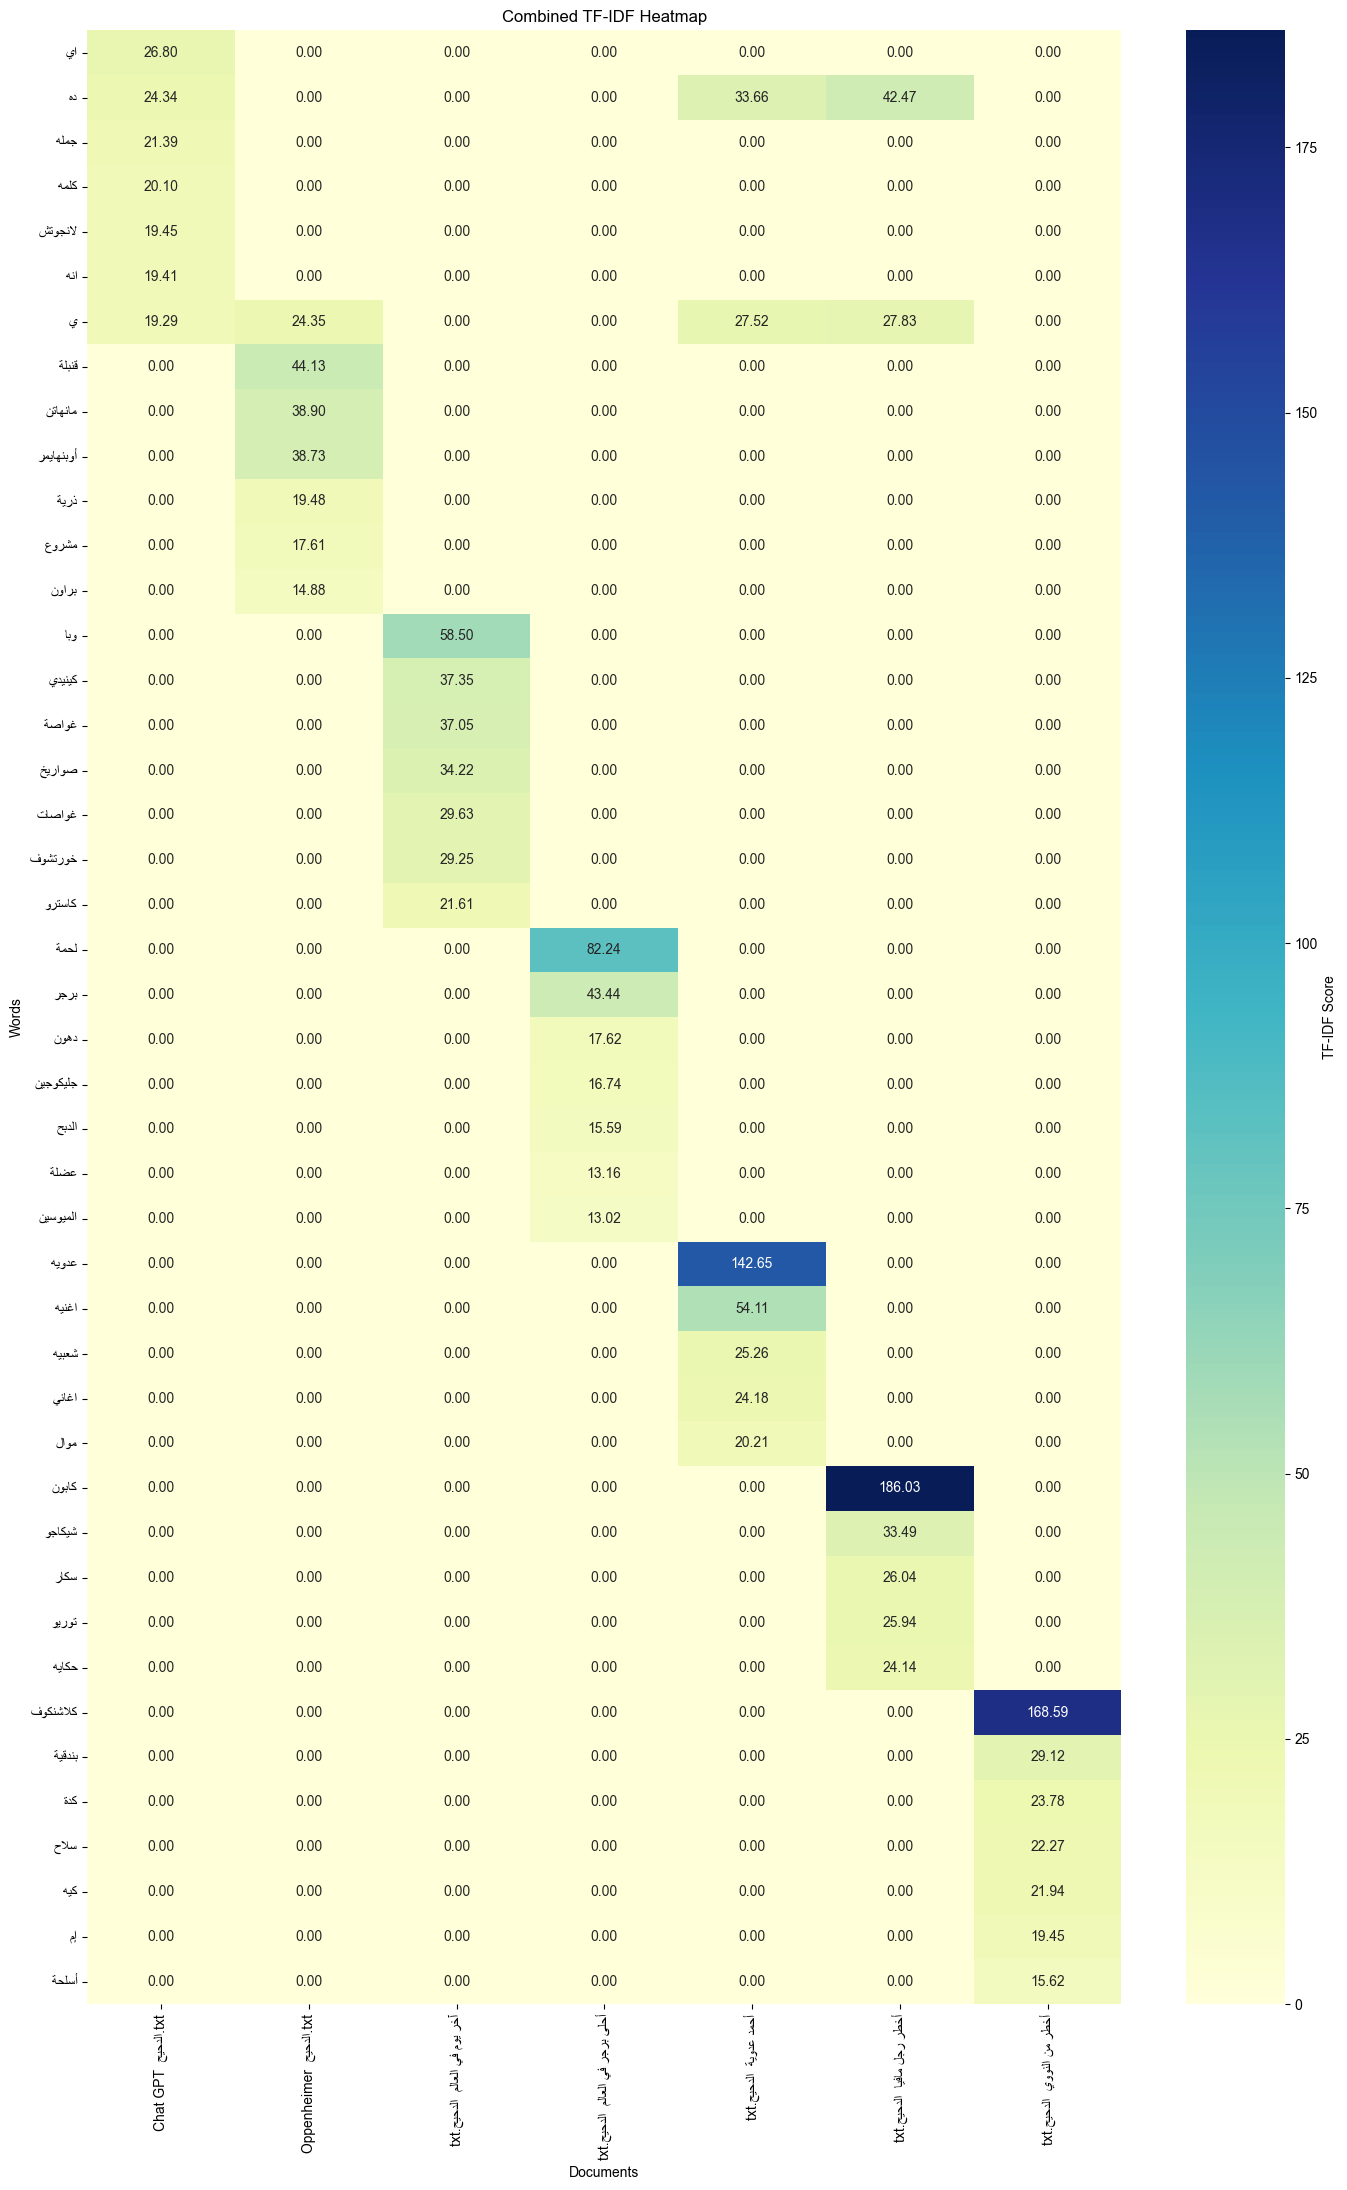

In [41]:
top_scores=get_top_words(tf_idf_values)
create_combined_heatmap(top_scores)

### Top 100 and 150 words that are frequent across documents (not cleaned)

In [42]:
top_100_frequent_idf=find_top_100(idf)

In [43]:
top_150_frequent_idf=find_top_150(idf)

### Top 100 and 150 words that are frequent across documents (cleaned)

In [44]:
top_100_freq_idf_cleaned= find_top_100(idf_cleaned)

In [45]:
top_150_freq_idf_cleaned= find_top_150(idf_cleaned)

### Word Cloud For (all docs)

In [46]:
from wordcloud import WordCloud
import arabic_reshaper
import matplotlib.pyplot as plt
import os
from bidi.algorithm import get_display

def generate_wordcloud_from_dict(word_counts):
    font_directory = os.path.join(os.getcwd(), "font")
    for file in os.listdir(font_directory):
        if file.endswith(".ttf"): 
            font_file = os.path.join(font_directory, file)
            break
    if not font_file:
        raise FileNotFoundError("No .ttf font file found in the specified directory!")
    
    reshaped_word_counts = {
        get_display(arabic_reshaper.reshape(word)): count for word, count in word_counts.items()
    }
    
    wordcloud = WordCloud(
        font_path=font_file,
        width=5000,
        height=4000,
        random_state=1,
        background_color='white',
        colormap='Set2'
    ).generate_from_frequencies(reshaped_word_counts)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


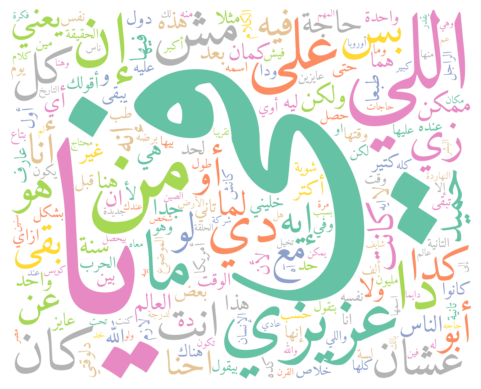

In [47]:
generate_wordcloud_from_dict(word_count_in_all_doc)

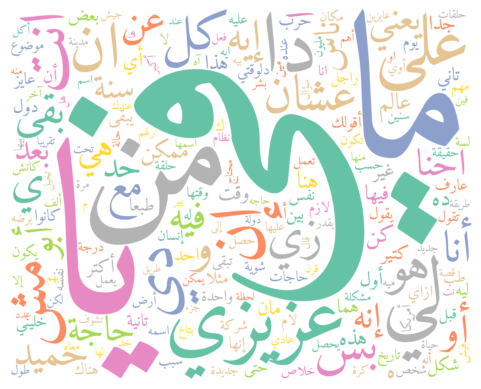

In [48]:
generate_wordcloud_from_dict(cleaned_count_per_doc)

### Word Cloud for Rare Words in All Documents

In [49]:
def generate_word_cloud_rare(idf, word_count_in_all_doc):
    reversed_idf = {key: idf[key] for key in reversed(idf)}
    rare=dict()
    counter=0
    for entry in reversed_idf:
        rare[entry]=word_count_in_all_doc[entry]
        counter+=1
        if(counter==100):
            break
    generate_wordcloud_from_dict(rare) 
        


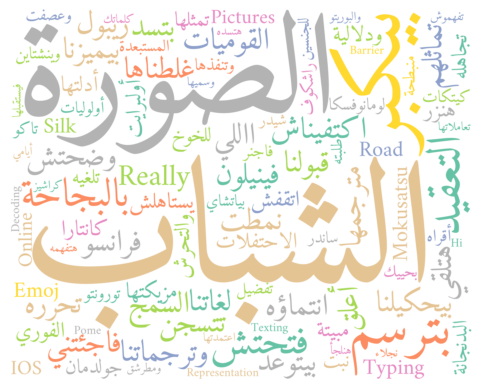

In [50]:
generate_word_cloud_rare(idf,word_count_in_all_doc)

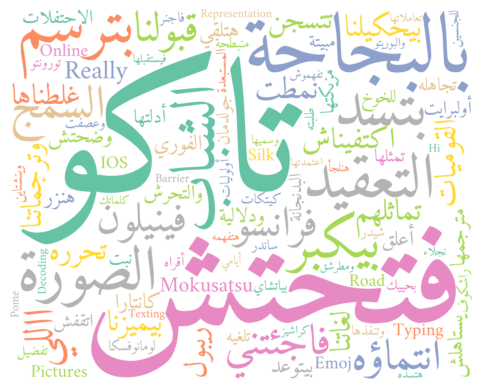

In [51]:
generate_word_cloud_rare(idf_cleaned,cleaned_count_per_doc)

### Analysis for after

In [52]:
tokenize_all_documents_after, doc_lengths_after= tokenize_all_documents("Preprocessed Data")

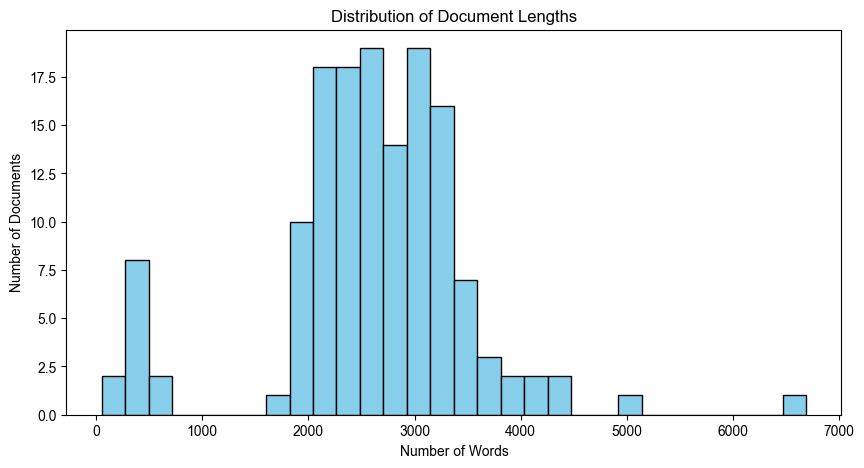

In [53]:
plot_distribution(doc_lengths_after)

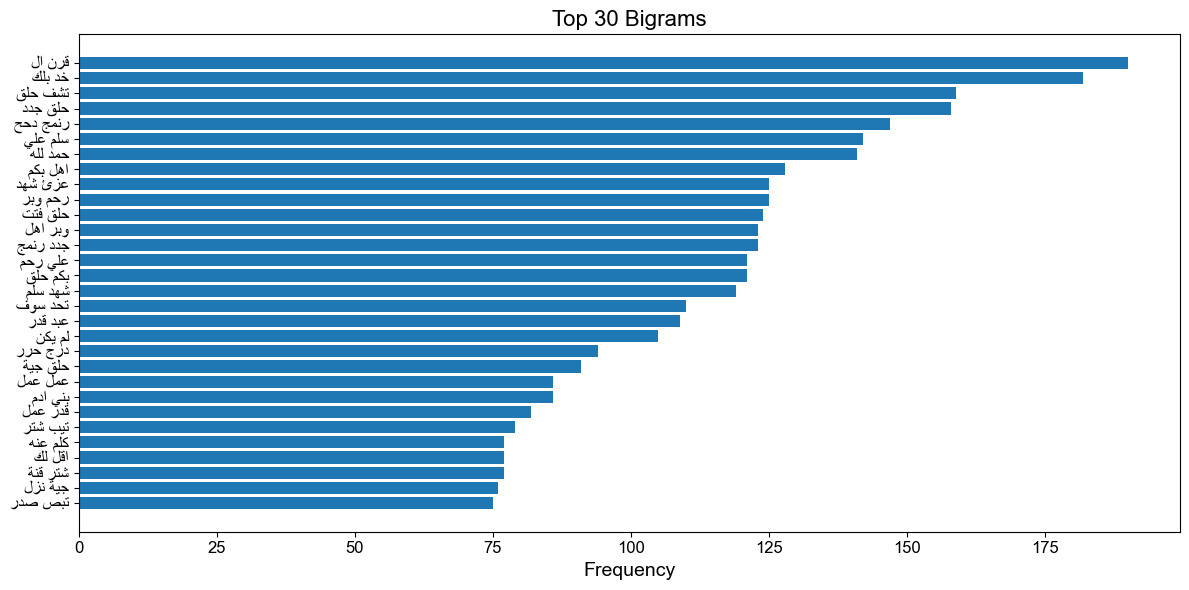

In [54]:
plot_bigram(tokenize_all_documents_after)

In [55]:
word_count_in_doc_after= word_count_per_document(tokenize_all_documents_after)

In [56]:
all_doc_words_after= count_word_across_docs(word_count_in_doc_after)

In [57]:
all_doc_words_after

{'موسيقى': 192,
 'عمي': 29,
 'بسو': 12,
 'ايم': 248,
 'رجل': 673,
 'طيب': 131,
 'فكر': 1577,
 'عم': 251,
 'سمح': 165,
 'بعد': 1023,
 'استبدلتو': 1,
 'ذكء': 174,
 'صطناع': 28,
 'وعش': 114,
 'ذكى': 25,
 'تمم': 102,
 'شربش': 6,
 'جير': 43,
 'كتب': 1062,
 'ادك': 23,
 'حتج': 633,
 'ليس': 211,
 'وسط': 251,
 'خبر': 442,
 'عمر': 579,
 'تيج': 185,
 'كنه': 61,
 'كمبيوتر': 70,
 'حقق': 779,
 'بتج': 73,
 'انس': 303,
 'صنع': 599,
 'احس': 237,
 'طبع': 585,
 'رضع': 33,
 'عسل': 29,
 'جبل': 102,
 'نحل': 58,
 'اصل': 442,
 'جمل': 721,
 'رجو': 81,
 'شوف': 177,
 'لنا': 45,
 'حل': 83,
 'شغل': 920,
 'بسم': 212,
 'رحم': 239,
 'خد': 320,
 'بلك': 284,
 'حضر': 461,
 'خذ': 8,
 'خلص': 598,
 'نجز': 16,
 'زبد': 16,
 'بتع': 1392,
 'زيتو': 1,
 'اشي': 161,
 'بكل': 111,
 'خضر': 65,
 'عيز': 716,
 'خطه': 19,
 'سهل': 422,
 'بسط': 627,
 'اول': 535,
 'حجه': 286,
 'جرب': 351,
 'تدس': 15,
 'زرر': 21,
 'بور': 36,
 'دوس': 21,
 'شتغلش': 8,
 'ثني': 367,
 'سخن': 50,
 'بيظ': 15,
 'هصلح': 1,
 'عرف': 1765,
 'صلح': 291,
 'كوس': 368,
 'ق

In [63]:
choose_frequent_words_550(all_doc_words_after)

['رجل',
 'فكر',
 'بعد',
 'كتب',
 'حتج',
 'عمر',
 'حقق',
 'صنع',
 'طبع',
 'جمل',
 'شغل',
 'خلص',
 'بتع',
 'عيز',
 'بسط',
 'عرف',
 'سلم',
 'علي',
 'حلق',
 'جدد',
 'ظهر',
 'جمع',
 'درس',
 'عند',
 'قدر',
 'عرض',
 'تخل',
 'علم',
 'حول',
 'فرق',
 'وجد',
 'عمل',
 'كتر',
 'قدم',
 'بشر',
 'نفس',
 'مهم',
 'شرك',
 'عبر',
 'يقل',
 'خلف',
 'نظر',
 'كلم',
 'وصل',
 'شهر',
 'فعل',
 'حاج',
 'رجع',
 'اخر',
 'طرق',
 'وقع',
 'كمل',
 'شكل',
 'كبر',
 'اسم',
 'قعد',
 'طلع',
 'درج',
 'ال',
 'بيه',
 'سبب',
 'عدي',
 'فضل',
 'دخل',
 'شخص',
 'وحد',
 'قرب',
 'بقى',
 'ارخ',
 'قبل',
 'حصل',
 'لعب',
 'امر',
 'حرب',
 'دول',
 'حكم',
 'دين',
 'نظم',
 'عرب',
 'بدأ']

In [64]:
idf_after=calculate_idf(word_count_in_doc_after)

In [ ]:
generate_wordcloud_from_dict(all_doc_words_after)

In [ ]:
generate_word_cloud_rare(idf_after,all_doc_words_after)

In [ ]:
tf_idf_values_after= compute_tf_idf(idf_after,word_count_in_doc_after)

In [ ]:
top_scores_after= get_top_words(tf_idf_values_after)

In [ ]:
create_combined_heatmap(top_scores_after)